In [10]:
import numpy as np
import torch 
import matplotlib.pyplot as plt

In [2]:
A = np.array([[-1,4],[2,-2]])
A

array([[-1,  4],
       [ 2, -2]])

In [5]:
values,V = np.linalg.eig(A)
print("Eigen values: ",values,'\n')
print("Eigenvectors: \n",V)

Eigen values:  [ 1.37228132 -4.37228132] 

Eigenvectors: 
 [[ 0.86011126 -0.76454754]
 [ 0.51010647  0.64456735]]


In [12]:
v1 = V[:,0]
v1

array([0.86011126, 0.51010647])

In [15]:
lambda1 = values[0]
lambda1

1.3722813232690143

In [28]:
#A*v = lambda*v 
Av1 = (np.dot(A,v1))
lv1 =(np.dot(v1,lambda1))

print(Av1)
print(lv1)

[1.18031462 0.70000958]
[1.18031462 0.70000958]


In [29]:
def plot_vectors(vectors, colors): #
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

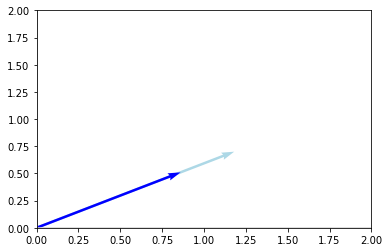

In [31]:
plot_vectors([Av1,v1],['lightblue','blue']) 
plt.xlim(-0,2)
_ = plt.ylim(-0,2)

In [34]:
#vector2

v2 = V[:,1]
lambda2 = values[1]

Av2 = np.dot(A,v2)
lv2 = np.dot(v2,lambda2)

print(Av2,"\n",lv2)plot_vectors([v,Rv],['lightblue','blue']) 
plt.xlim(-4,5)
_ = plt.ylim(-4,3)

[ 3.34281692 -2.81822977] 
 [ 3.34281692 -2.81822977]


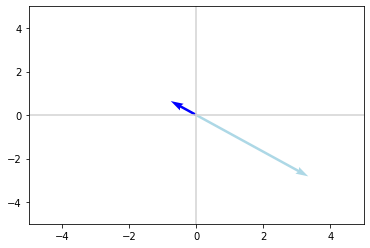

In [35]:
plot_vectors([Av2,v2],['lightblue','blue']) 
plt.xlim(-5,5)
_ = plt.ylim(-5,5)

In [ ]:
#-------------------------------------PYTORCH------------------------------------------------#

In [48]:
A_p = torch.tensor([[-1,4],[2,-2.]])
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [59]:
eigens = torch.eig(A_p,eigenvectors=True)
print(eigens.eigenvectors)
print(eigens.eigenvalues)

tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]])
tensor([[ 1.3723,  0.0000],
        [-4.3723,  0.0000]])


In [69]:
v1_p = eigens.eigenvectors[:,0]
print(v1_p)

lambda1_p = eigens.eigenvalues[0][0]
print(lambda1_p)

tensor([0.8601, 0.5101])
tensor(1.3723)


In [71]:
Av1_p=(torch.matmul(A_p,v1_p))
(v1_p*lambda1_p)

tensor([1.1803, 0.7000])

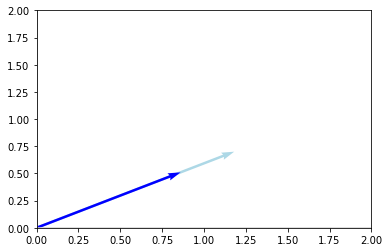

In [73]:
plot_vectors([Av1_p,v1_p],['lightblue','blue']) 
plt.xlim(0,2)
_ = plt.ylim(0,2)

In [79]:
#3D -eigenvectors

B = torch.tensor([[25,2,9],[5,26,-5],[3,7,-1.]])
B

tensor([[25.,  2.,  9.],
        [ 5., 26., -5.],
        [ 3.,  7., -1.]])

In [81]:
eigens1 = torch.eig(B,eigenvectors=True)
print(eigens1.eigenvalues)
print(eigens1.eigenvectors)

tensor([[29.6762,  0.0000],
        [20.6212,  0.0000],
        [-0.2974,  0.0000]])
tensor([[ 0.7118,  0.6502, -0.3422],
        [ 0.6665, -0.7446,  0.2379],
        [ 0.2217, -0.1509,  0.9090]])


In [89]:
v1  = eigens1.eigenvectors[:,0]
print(v1)

Bv1 = torch.matmul(B,v1)
print(Bv1)

lambdav1 = v1*(eigens1.eigenvalues[0][0])
print(lambdav1)

tensor([0.7118, 0.6665, 0.2217])
tensor([21.1223, 19.7798,  6.5792])
tensor([21.1223, 19.7798,  6.5792])


In [90]:
v2  = eigens1.eigenvectors[:,1]
print(v2)

Bv2 = torch.matmul(B,v2)
print(Bv2)

lambdav2 = v2*(eigens1.eigenvalues[1][0])
print(lambdav2)

tensor([ 0.6502, -0.7446, -0.1509])
tensor([ 13.4077, -15.3554,  -3.1110])
tensor([ 13.4077, -15.3554,  -3.1110])


In [91]:
v3  = eigens1.eigenvectors[:,2]
print(v3)

Bv3 = torch.matmul(B,v3)
print(Bv3)

lambdav3 = v3*(eigens1.eigenvalues[2][0])
print(lambdav3)

tensor([-0.3422,  0.2379,  0.9090])
tensor([ 0.1018, -0.0708, -0.2703])
tensor([ 0.1018, -0.0708, -0.2703])


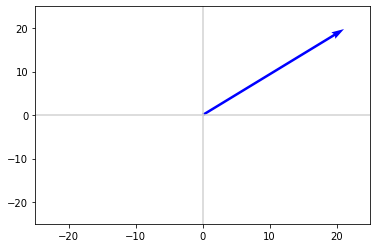

In [93]:
plot_vectors([v1,Bv1],['lightblue','blue'])
plt.xlim(-25,25)
_ = plt.ylim(-25,25)
